In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
Data_Day=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\train.csv")
Data_Day.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [144]:
print(Data_Day.dtypes)


id              int64
season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


In [145]:
print(Data_Day.shape)

(365, 12)


In [146]:
print(Data_Day.columns)

Index(['id', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [147]:
print(Data_Day.nunique())

id            365
season          4
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          294
atemp         353
hum           332
windspeed     349
cnt           352
dtype: int64


In [148]:
Data_Day = Data_Day.drop(Data_Day.columns[[0]], axis = "columns")

In [149]:
print(Data_Day.nunique())

season          4
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          294
atemp         353
hum           332
windspeed     349
cnt           352
dtype: int64


In [150]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [179]:
Data_Day.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

temp


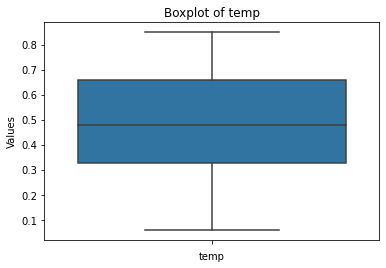

atemp


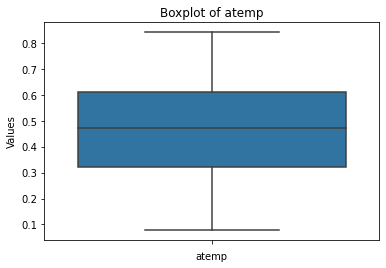

hum


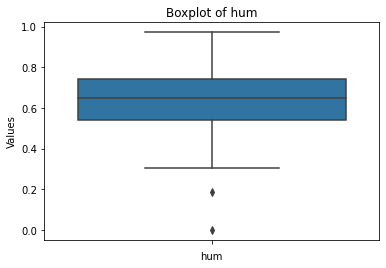

windspeed


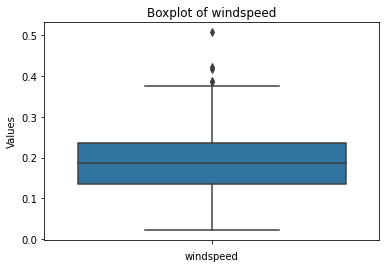

cnt


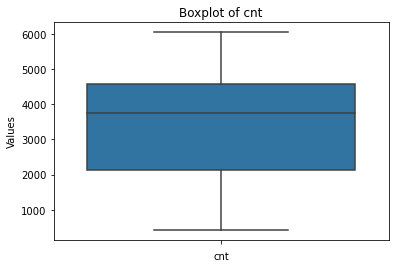

In [152]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

In [153]:
for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.1725005
Upperfence= 1.1541675
IQR =0.331667
atemp
Innerfence= -0.11368349999999999
Upperfence= 1.0480165000000001
IQR =0.290425
hum
Innerfence= 0.2327079999999998
Upperfence= 1.047708
IQR =0.2037500000000001
windspeed
Innerfence= -0.013655000000000056
Upperfence= 0.384313
IQR =0.09949200000000002
cnt
Innerfence= -1549.0
Upperfence= 8267.0
IQR =2454.0


In [154]:
Data_Day.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           2
windspeed     5
cnt           0
dtype: int64

In [155]:
Data_Day['hum'] = Data_Day['hum'].fillna(Data_Day['hum'].median())
Data_Day['windspeed'] = Data_Day['windspeed'].fillna(Data_Day['windspeed'].median())

In [156]:
Data_Day.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

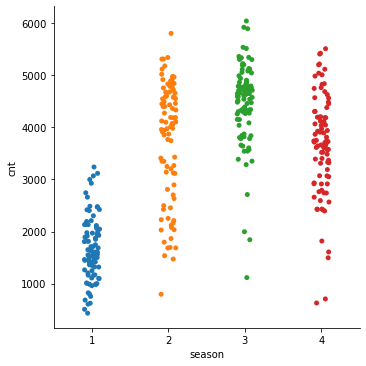

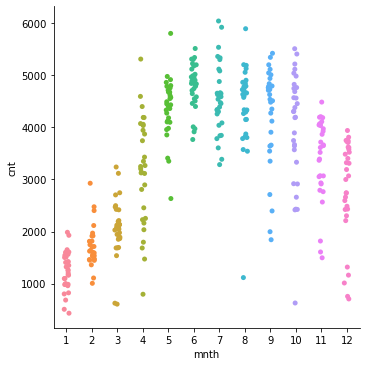

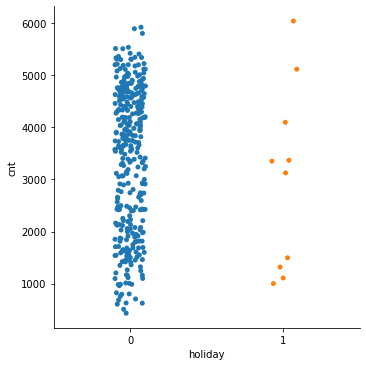

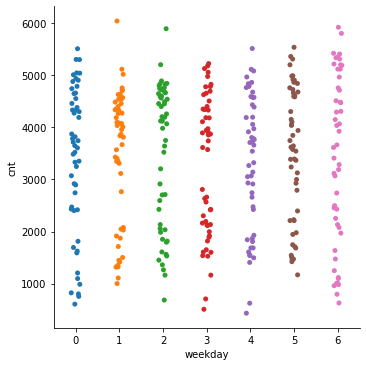

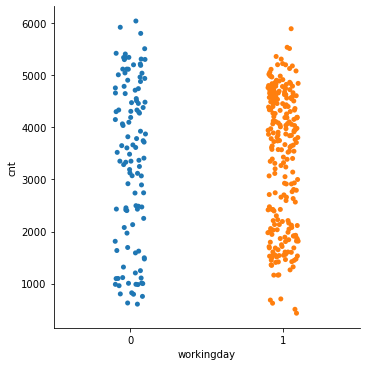

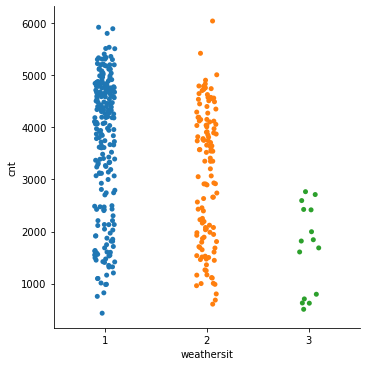

In [157]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=Data_Day)

Text(0.5, 0, 'Windspeed')

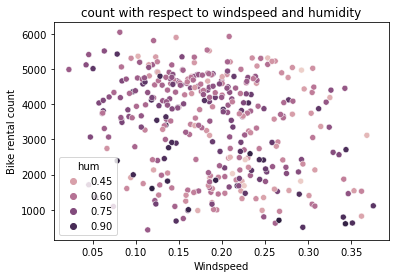

In [158]:
scatter_plot1 = sns.scatterplot(x="windspeed", y="cnt", hue="hum", data= Data_Day)

plt.title("count with respect to windspeed and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Windspeed")


In [159]:
Data_Day_cor = Data_Day.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.996458  0.141293  -0.113548  0.771214
atemp      0.996458  1.000000  0.152295  -0.137742  0.775294
hum        0.141293  0.152295  1.000000  -0.160292 -0.034534
windspeed -0.113548 -0.137742 -0.160292   1.000000 -0.267443
cnt        0.771214  0.775294 -0.034534  -0.267443  1.000000


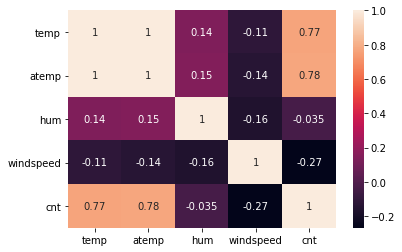

In [160]:
heatmap = sns.heatmap(correlation_result, annot=True)

In [161]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_var:
    mod = ols('cnt' + '~' + i, data = Data_Day).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    2.031156e+08    1.0  150.830109  3.121329e-29
Residual  4.888345e+08  363.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      1.367816e+08    1.0  89.435421  4.060115e-19
Residual  5.551684e+08  363.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.674497e+06    1.0  0.880579  0.348667
Residual  6.902756e+08  363.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.337360e+04    1.0  0.007016  0.933292
Residual  6.919367e+08  363.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  2.953899e+05    1.0  0.155029  0.694006
Residual    6.916547e+08  363.0       NaN       NaN
                  sum_sq     df          F        PR(>F)
weathersit  7.009360e+07    1.0  40.916157  4.898884e-10
Residual    6.218565e+08  363.0        NaN           NaN


In [162]:
numeric_var = ["temp",'atemp',"hum","windspeed","cnt"]   # numeric variables

categorical_var = ["season",'holiday', "mnth", "weathersit",'weekday','workingday']   # categorical variables

temp


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


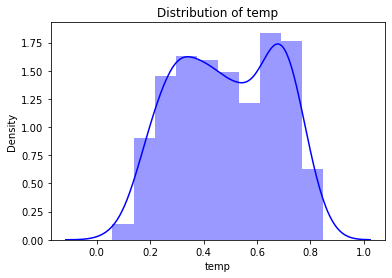

atemp


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


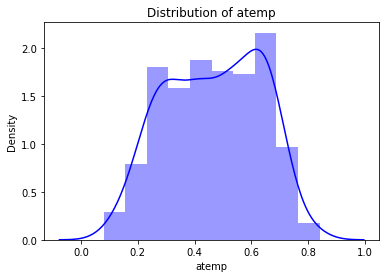

hum


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


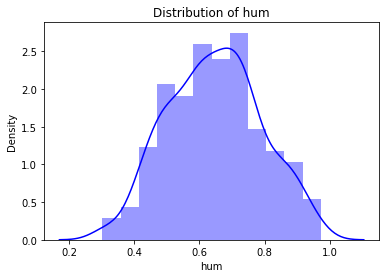

windspeed


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


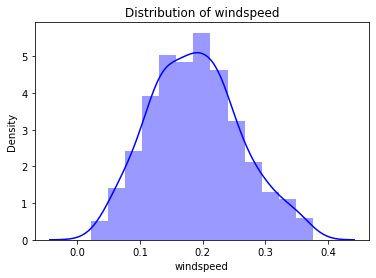

C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


cnt


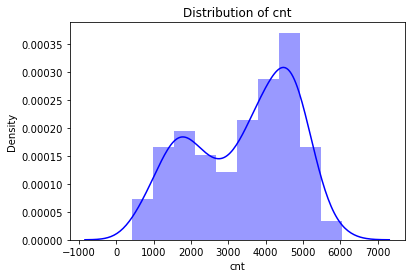

In [163]:
for i in numeric_var:
    print(i)
    sns.distplot(Data_Day[i], bins = 'auto', color = 'blue')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

In [164]:
Data_Day.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.646700,0.188134,3405.761644
std,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.142852,0.071625,1378.753666
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.302174,0.022392,431.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.540833,0.135583,2132.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647917,0.185642,3740.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.232970,4586.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.375617,6043.000000


In [165]:
df = Data_Day.copy()
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985.0
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349.0
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562.0
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600.0


In [166]:
df_for_KFCV = df

In [167]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr

In [168]:
def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [169]:
X = df.drop(['cnt'], axis = "columns")
y = df['cnt']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [171]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Prediction

DT_initial_pred = DT_regressor.predict(X_test)

# MAPE
DTMape_Test = MAPE(y_test, DT_pred1)


# Rsquare - Test Data

DTR2_Test = Rsquare(y_test, DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])


print("MAPE ="+str(DTMape_Test))
print("Accuracy =" + str(100 - DTMape_Test))
print("Rsquare ="+str(DTR2_Test2))

MAPE =28.886364403244695
Accuracy =71.1136355967553
Rsquare =0.6184963603348375


In [172]:
len(X_train)

292

In [173]:
len(y_train)

292

In [174]:
len(X_test)

73

In [175]:
len(y_test)

73

In [176]:
DT_initial_pred

array([1772.02, 4520.91, 1772.02, 1772.02, 1772.02, 3268.14, 1772.02,
       3268.14, 4520.91, 1772.02, 1772.02, 4520.91, 2752.64, 4520.91,
       4520.91, 4520.91, 3268.14, 4520.91, 4520.91, 4520.91, 4520.91,
       4520.91, 1772.02, 3268.14, 3268.14, 4520.91, 1772.02, 4520.91,
       4520.91, 4520.91, 4520.91, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 4520.91, 2752.64, 1772.02, 4520.91, 3268.14,
       4520.91, 4520.91, 1772.02, 3268.14, 4520.91, 4520.91, 4520.91,
       1772.02, 4520.91, 4520.91, 4520.91, 4520.91, 1772.02, 1772.02,
       1772.02, 4520.91, 1772.02, 4520.91, 3268.14, 4520.91, 1772.02,
       4520.91, 3268.14, 3268.14, 1772.02, 4520.91, 4520.91, 4520.91,
       1772.02, 4520.91, 4520.91])

In [177]:
from sklearn.metrics import r2_score
score=r2_score(y_test,DT_initial_pred)
print("Testing score : ", score)

Testing score :  0.5933596631759862


In [178]:
dataset_test=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\test.csv")
dataset_test.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987


In [125]:
len(dataset_test)

366

In [129]:
dataset_test_proccessed = dataset_test.drop(['id','atemp', 'holiday', 'weekday', 'workingday'], axis = "columns")

In [130]:
dataset_test_proccessed

,season,mnth,weathersit,temp,hum,windspeed
0,1,1,1,0.370000,0.692500,0.192167
1,1,1,1,0.273043,0.381304,0.329665
2,1,1,1,0.150000,0.441250,0.365671
3,1,1,2,0.107500,0.414583,0.184700
4,1,1,1,0.265833,0.524167,0.129987
...,...,...,...,...,...,...
361,1,12,2,0.254167,0.652917,0.350133
362,1,12,2,0.253333,0.590000,0.155471
363,1,12,2,0.253333,0.752917,0.124383
364,1,12,1,0.255833,0.483333,0.350754


In [133]:
dt_test_pred = DT_regressor.predict(dataset_test_proccessed)
np.set_printoptions(precision=2)

In [134]:
dt_test_pred

array([1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 4520.91, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 4520.91, 1772.02, 1772.02,
       1772.02, 1772.02, 1772.02, 1772.02, 4520.91, 1772.02, 1772.02,
       1772.02, 4520.91, 4520.91, 4520.91, 4520.91, 1772.02, 4520.91,
       4520.91, 4520.91, 4520.91, 4520.91, 4520.91, 4520.91, 4520.91,
       1772.02, 1772.02, 1772.02, 4520.91, 4520.91, 1772.02, 1772.02,
       1772.02, 1772.02, 4520.91, 4520.91, 1772.02, 1772.02, 1772.02,
       4520.91, 4520

In [135]:
submission=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\sample_submission.csv")
submission.head()

,id,cnt
0,366,2324.704634
1,367,1825.998871
2,368,1246.661929
3,369,1067.359745
4,370,2349.727614


In [136]:
df=pd.DataFrame(submission)

In [138]:
df['cnt']=dt_test_pred

In [139]:
df

,id,cnt
0,366,1772.022472
1,367,1772.022472
2,368,1772.022472
3,369,1772.022472
4,370,1772.022472
...,...,...
361,727,1772.022472
362,728,1772.022472
363,729,1772.022472
364,730,1772.022472


In [140]:
print(df.to_string(index=False))

  id          cnt
 366  1772.022472
 367  1772.022472
 368  1772.022472
 369  1772.022472
 370  1772.022472
 371  1772.022472
 372  1772.022472
 373  1772.022472
 374  1772.022472
 375  1772.022472
 376  1772.022472
 377  1772.022472
 378  1772.022472
 379  1772.022472
 380  1772.022472
 381  1772.022472
 382  1772.022472
 383  1772.022472
 384  1772.022472
 385  1772.022472
 386  1772.022472
 387  1772.022472
 388  1772.022472
 389  1772.022472
 390  1772.022472
 391  1772.022472
 392  1772.022472
 393  1772.022472
 394  1772.022472
 395  1772.022472
 396  1772.022472
 397  4520.906040
 398  1772.022472
 399  1772.022472
 400  1772.022472
 401  1772.022472
 402  1772.022472
 403  1772.022472
 404  1772.022472
 405  1772.022472
 406  1772.022472
 407  1772.022472
 408  1772.022472
 409  1772.022472
 410  1772.022472
 411  1772.022472
 412  1772.022472
 413  1772.022472
 414  1772.022472
 415  1772.022472
 416  1772.022472
 417  1772.022472
 418  1772.022472
 419  1772.022472
 420  1772

In [141]:
df.to_csv('C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\DT_TEST__submission1.csv',index=False)